In [2]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/lyra/Documents/Solar Flares/nasa-space-apps/Ananya_Files/Merged_Dataset.csv')

In [3]:
status_corr = corr_matrix = df.corr()

/tmp/ipykernel_3048/112474960.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  status_corr = corr_matrix = df.corr()


In [5]:
corr_matrix['Kp']

Source            NaN
Bt-med       0.461541
Bt-min       0.262964
Bt-max       0.509892
Bx-med       0.115556
Bx-min      -0.246782
Bx-max       0.379723
By-med      -0.190418
By-min      -0.438852
By-max       0.175310
Bz-med      -0.307702
Bz-min      -0.553441
Bz-max       0.284001
Phi-mean     0.099127
Phi-min     -0.112884
Phi-max      0.212058
Theta-med   -0.306134
Theta-min   -0.377338
Theta-max   -0.001676
Dens-med     0.368672
Dens-min     0.181290
Dens-max     0.434421
Speed-med    0.376575
Speed-min    0.323192
Speed-max    0.390018
Temp-med     0.115353
Temp-min     0.001915
Temp-max     0.174605
Kp           1.000000
Name: Kp, dtype: float64

In [6]:
df1 = df.copy()

In [7]:
df1.drop(columns=['Timestamp', 'Temp-max'], inplace=True)

In [8]:
df1.columns

Index(['Source', 'Bt-med', 'Bt-min', 'Bt-max', 'Bx-med', 'Bx-min', 'Bx-max',
       'By-med', 'By-min', 'By-max', 'Bz-med', 'Bz-min', 'Bz-max', 'Phi-mean',
       'Phi-min', 'Phi-max', 'Theta-med', 'Theta-min', 'Theta-max', 'Dens-med',
       'Dens-min', 'Dens-max', 'Speed-med', 'Speed-min', 'Speed-max',
       'Temp-med', 'Temp-min', 'Kp'],
      dtype='object')

In [9]:
status_corr = corr_matrix = df1.corr()

In [10]:
corr_matrix['Kp']

Source            NaN
Bt-med       0.461541
Bt-min       0.262964
Bt-max       0.509892
Bx-med       0.115556
Bx-min      -0.246782
Bx-max       0.379723
By-med      -0.190418
By-min      -0.438852
By-max       0.175310
Bz-med      -0.307702
Bz-min      -0.553441
Bz-max       0.284001
Phi-mean     0.099127
Phi-min     -0.112884
Phi-max      0.212058
Theta-med   -0.306134
Theta-min   -0.377338
Theta-max   -0.001676
Dens-med     0.368672
Dens-min     0.181290
Dens-max     0.434421
Speed-med    0.376575
Speed-min    0.323192
Speed-max    0.390018
Temp-med     0.115353
Temp-min     0.001915
Kp           1.000000
Name: Kp, dtype: float64

In [11]:
def feature_selector_correlation(cmatrix, threshold):
    selected_features = []
    feature_score = []
    
    #kick the non-numeric columns
    numeric_columns = cmatrix.select_dtypes(include=['int64', 'float64'])
    
    for column_name in numeric_columns.columns:
        score = cmatrix[column_name].corr(cmatrix['Kp']) # correlation with Kp
        if abs(score) > threshold:
            selected_features.append(column_name)
            feature_score.append(['{:3f}'.format(score)])
    
    result = list(zip(selected_features, feature_score))
    return result

In [12]:
features_selected = feature_selector_correlation(status_corr, 0.5)
features_selected

[('Bt-med', ['0.701943']),
 ('Bt-min', ['0.518566']),
 ('Bt-max', ['0.745582']),
 ('Bx-max', ['0.684974']),
 ('By-min', ['-0.724851']),
 ('Bz-med', ['-0.659087']),
 ('Bz-min', ['-0.916825']),
 ('Theta-med', ['-0.609186']),
 ('Theta-min', ['-0.753477']),
 ('Dens-med', ['0.623593']),
 ('Dens-max', ['0.743995']),
 ('Speed-max', ['0.539387']),
 ('Kp', ['1.000000'])]

In [13]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Source     748 non-null    int64  
 1   Bt-med     748 non-null    float64
 2   Bt-min     748 non-null    float64
 3   Bt-max     748 non-null    float64
 4   Bx-med     748 non-null    float64
 5   Bx-min     748 non-null    float64
 6   Bx-max     748 non-null    float64
 7   By-med     748 non-null    float64
 8   By-min     748 non-null    float64
 9   By-max     748 non-null    float64
 10  Bz-med     748 non-null    float64
 11  Bz-min     748 non-null    float64
 12  Bz-max     748 non-null    float64
 13  Phi-mean   748 non-null    float64
 14  Phi-min    748 non-null    float64
 15  Phi-max    748 non-null    float64
 16  Theta-med  748 non-null    float64
 17  Theta-min  748 non-null    float64
 18  Theta-max  748 non-null    float64
 19  Dens-med   748 non-null    float64
 20  Dens-min  

In [3]:
import pandas as pd
csv_file = "Merged_Dataset.csv"  
df = pd.read_csv(csv_file)

In [5]:
selected_columns = [
    'Timestamp', 'Bt-med', 'Bt-min', 'Bt-max', 'Bx-max', 'By-min', 'Bz-med',
    'Bz-min', 'Theta-med', 'Theta-min', 'Dens-med', 'Dens-max',
    'Speed-max', 'Kp' 
]

selected_df = df[selected_columns]


In [6]:
selected_df

,Timestamp,Bt-med,Bt-min,Bt-max,Bx-max,By-min,Bz-med,Bz-min,Theta-med,Theta-min,Dens-med,Dens-max,Speed-max,Kp
0,01-04-2023 00:00,5.49,1.95,7.08,4.79,-5.46,3.39,-4.92,40.60,-61.05,9.13,12.90,538.6,2.000
1,01-04-2023 06:00,5.18,3.81,6.55,5.43,-5.54,0.96,-5.10,11.31,-71.38,9.83,12.70,559.2,1.667
2,01-04-2023 12:00,5.51,4.41,6.71,5.48,-5.51,-0.96,-5.53,-10.74,-69.76,10.37,12.37,561.0,3.333
3,01-04-2023 18:00,6.07,5.22,7.14,6.14,-5.56,-1.37,-5.88,-13.57,-82.23,10.18,13.79,585.5,2.667
4,02-04-2023 00:00,6.09,4.96,6.77,5.12,-6.69,-2.18,-5.05,-21.07,-61.84,11.93,13.35,568.3,3.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,03-10-2023 18:00,7.72,6.74,8.60,-3.91,-3.11,-1.55,-3.40,-11.50,-29.79,4.13,6.16,469.3,2.000
744,04-10-2023 00:00,8.46,7.42,9.51,-0.40,-0.17,-1.11,-5.36,-7.74,-40.53,2.27,4.78,437.3,3.000
745,04-10-2023 06:00,8.00,5.81,8.57,-0.20,-0.77,-3.69,-7.06,-28.54,-68.96,3.05,6.98,477.1,2.333
746,04-10-2023 12:00,7.02,6.13,7.89,3.32,2.80,-0.84,-4.97,-6.99,-49.32,2.91,6.55,475.3,1.667


In [7]:
df.shape

(748, 30)

In [8]:
# Create a copy of the selected DataFrame to avoid warnings
selected_df = df[['Timestamp', 'Bt-med', 'Bt-min', 'Bt-max', 'Bx-max', 'By-min', 'Bz-med', 'Bz-min', 'Theta-med', 'Theta-min', 'Dens-med', 'Dens-max', 'Speed-max', 'Kp']].copy()

# Convert 'Timestamp' column to datetime
selected_df['Timestamp'] = pd.to_datetime(selected_df['Timestamp'], format='%d-%m-%Y %H:%M')

# Convert datetime to Unix timestamps (float)
selected_df['Timestamp'] = selected_df['Timestamp'].astype(int) / 10**9  # Convert nanoseconds to seconds


In [9]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  748 non-null    float64
 1   Bt-med     748 non-null    float64
 2   Bt-min     748 non-null    float64
 3   Bt-max     748 non-null    float64
 4   Bx-max     748 non-null    float64
 5   By-min     748 non-null    float64
 6   Bz-med     748 non-null    float64
 7   Bz-min     748 non-null    float64
 8   Theta-med  748 non-null    float64
 9   Theta-min  748 non-null    float64
 10  Dens-med   748 non-null    float64
 11  Dens-max   748 non-null    float64
 12  Speed-max  748 non-null    float64
 13  Kp         748 non-null    float64
dtypes: float64(14)
memory usage: 81.9 KB


In [10]:
# export selected_df to csv

selected_df.to_csv('selected_df.csv', index=False)

#### SVM

In [11]:
# Use SVM to predict Kp 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

selected_df = pd.read_csv('selected_df.csv')
# Split the data into training and testing sets
X = selected_df.drop(columns=['Kp'])
y = selected_df['Kp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the mean absolute errorq
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean Squared Error: 1.691240848094737
Mean Absolute Error: 1.0436838418079097
R2 Score: -0.0013514546202710864


#### ARIMA NN

<Axes: xlabel='Timestamp'>

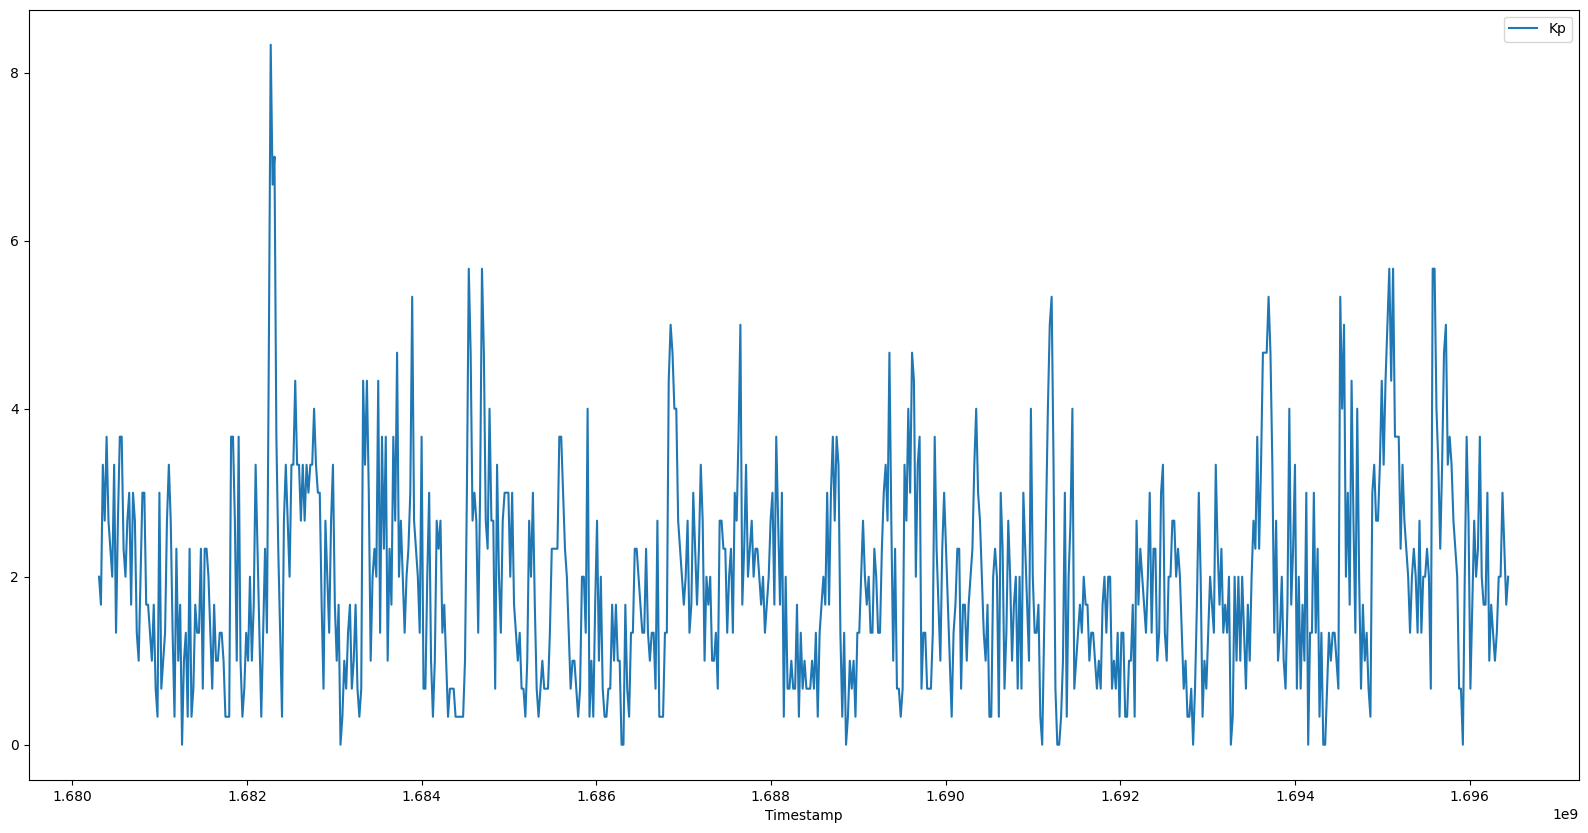

In [12]:
selected_df.plot(x='Timestamp', y='Kp', figsize=(20,10))

<Axes: >

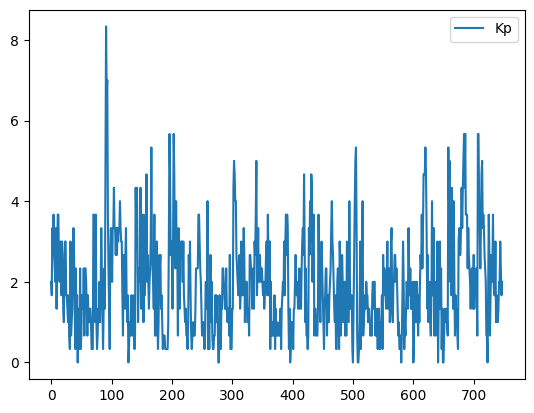

In [13]:
selected_df.plot(y = 'Kp')

##### Imports

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

##### Fitting model

In [15]:
model = ARIMA(selected_df['Kp'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     Kp   No. Observations:                  748
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1107.854
Date:                Sun, 08 Oct 2023   AIC                           2227.707
Time:                        00:52:04   BIC                           2255.404
Sample:                             0   HQIC                          2238.381
                                - 748                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4019      0.031    -13.097      0.000      -0.462      -0.342
ar.L2         -0.2256      0.038     -5.936      0.000      -0.300      -0.151
ar.L3         -0.1730      0.034     -5.035      0.0

##### Line plot of residuals

<Axes: >

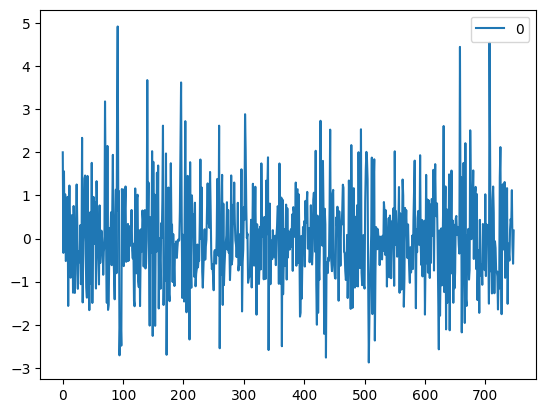

In [16]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()

##### Density plot of residuals

<Axes: ylabel='Density'>

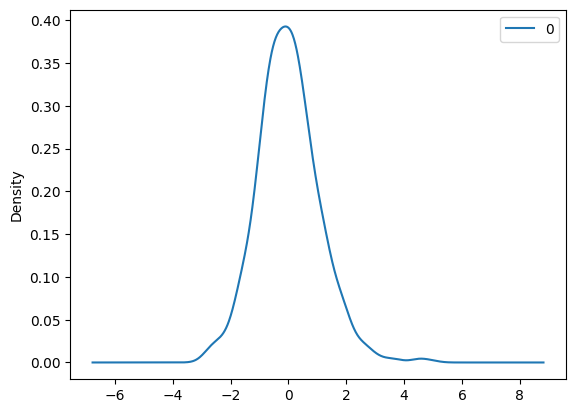

In [18]:
residuals.plot(kind='kde')

##### Summary Stats: The mean of the residuals is approximately 0.002756. On average, the residuals are very close to zero, which is a good sign. Ideally, the mean of the residuals should be close to zero, indicating that the model is not systematically over- or underestimating the target variable.

In [19]:
print(residuals.describe())

                0
count  748.000000
mean     0.002756
std      1.068633
min     -2.876077
25%     -0.669738
50%     -0.057680
75%      0.635483
max      4.920100


In [20]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  748 non-null    float64
 1   Bt-med     748 non-null    float64
 2   Bt-min     748 non-null    float64
 3   Bt-max     748 non-null    float64
 4   Bx-max     748 non-null    float64
 5   By-min     748 non-null    float64
 6   Bz-med     748 non-null    float64
 7   Bz-min     748 non-null    float64
 8   Theta-med  748 non-null    float64
 9   Theta-min  748 non-null    float64
 10  Dens-med   748 non-null    float64
 11  Dens-max   748 non-null    float64
 12  Speed-max  748 non-null    float64
 13  Kp         748 non-null    float64
dtypes: float64(14)
memory usage: 81.9 KB


##### Rolling Forest ARIMA

In [21]:
#### Train test split
X = selected_df['Kp'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [22]:
# Walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1.913691, expected=1.000000
predicted=1.488850, expected=4.000000
predicted=2.750668, expected=2.000000
predicted=2.174740, expected=1.333000
predicted=1.746931, expected=1.333000
predicted=1.606444, expected=1.667000
predicted=1.601793, expected=0.333000
predicted=1.115229, expected=0.000000
predicted=0.837691, expected=1.333000
predicted=1.400116, expected=2.667000
predicted=2.185178, expected=4.000000
predicted=3.121602, expected=5.000000
predicted=3.830758, expected=5.333000
predicted=4.070214, expected=3.333000
predicted=3.015100, expected=0.667000
predicted=1.327962, expected=0.000000
predicted=0.578207, expected=0.000000
predicted=0.483220, expected=0.333000
predicted=0.832612, expected=1.000000
predicted=1.396100, expected=3.000000
predicted=2.538316, expected=0.333000
predicted=1.392881, expected=2.000000
predicted=1.924089, expected=2.667000
predicted=2.314387, expected=4.000000
predicted=3.006084, expected=0.667000
predicted=1.662257, expected=1.000000
predicted=1.

/home/lyra/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.857133, expected=1.667000
predicted=1.801119, expected=3.000000
predicted=2.407118, expected=1.000000
predicted=1.613277, expected=1.667000
predicted=1.722214, expected=1.333000
predicted=1.654643, expected=1.000000
predicted=1.314916, expected=1.333000
predicted=1.576156, expected=2.000000
predicted=1.886353, expected=2.000000
predicted=1.989836, expected=3.000000
predicted=2.518413, expected=2.333000
predicted=2.319613, expected=1.667000
predicted=1.880623, expected=2.000000


Test RMSE: 1.054


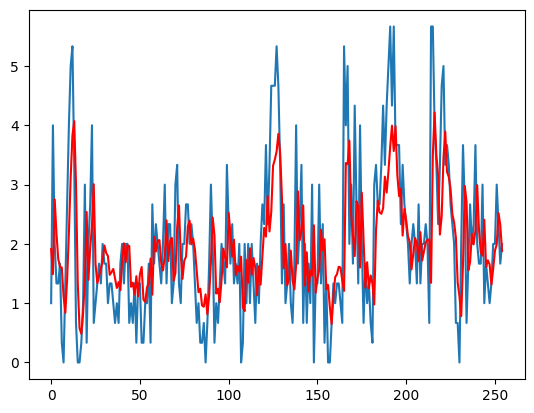

R2 Score: 0.33380525285412643


In [23]:
from math import sqrt
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# R2 score
r2 = r2_score(test, predictions)
print("R2 Score:", r2)

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### New file Merged_Kp.csv

##### Pre-processing

In [33]:
df = pd.read_csv('Merged_Kp.csv')

In [34]:
# check in values of each column for the string '#NAME?'
columns_with_name = df.columns[df.apply(lambda col: col.astype(str).str.contains('#NAME?').any())]

# Print the columns containing '#NAME?'
print("Columns with '#NAME?':", columns_with_name)

Columns with '#NAME?': Index(['Bx', 'By', 'Bz'], dtype='object')


In [35]:
# Loop through the columns containing '#NAME?' and replace it with NaN
for column in columns_with_name:
    df[column] = df[column].replace('#NAME?', np.nan)

In [36]:
df.isnull().sum()

Time    0
Bx      2
By      2
Bz      2
a       0
b       0
c       0
d       0
e       0
f       0
g       0
h       0
i       0
j       0
k       0
l       0
m       0
n       0
o       0
p       0
q       0
r       0
s       0
t       0
u       0
v       0
w       0
x       0
y       0
z       0
aa      0
ab      0
ac      0
ad      0
ae      0
af      0
ag      0
ah      0
ai      0
aj      0
ak      0
al      0
am      0
an      0
ao      0
ap      0
Kp      0
dtype: int64

In [38]:
# drop ROWS contaning NaN value
df = df.dropna()

In [39]:
# check null values in df
df.isnull().sum()

Time    0
Bx      0
By      0
Bz      0
a       0
b       0
c       0
d       0
e       0
f       0
g       0
h       0
i       0
j       0
k       0
l       0
m       0
n       0
o       0
p       0
q       0
r       0
s       0
t       0
u       0
v       0
w       0
x       0
y       0
z       0
aa      0
ab      0
ac      0
ad      0
ae      0
af      0
ag      0
ah      0
ai      0
aj      0
ak      0
al      0
am      0
an      0
ao      0
ap      0
Kp      0
dtype: int64

#### Deep Gaussian Process Regression

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [48]:
import pandas as pd
# df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y %H:%M')

# Convert datetime to Unix timestamps (float)
df['Time'] = df['Time'].astype(int) / 10**9  # Convert nanoseconds to seconds   

# Assuming 'Kp' is the column name for your target variable
X = df.drop('Kp', axis=1)  # Features
y = df['Kp']  # Target variable

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Define the Gaussian Process kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

In [51]:
# Create the Gaussian Process Regressor model
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

In [52]:
# Fit the model to the training data
gp_model.fit(X_train, y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10, random_state=42)

Mean Squared Error: 6.7724541838906775
R2 Score: -2.598738106258011


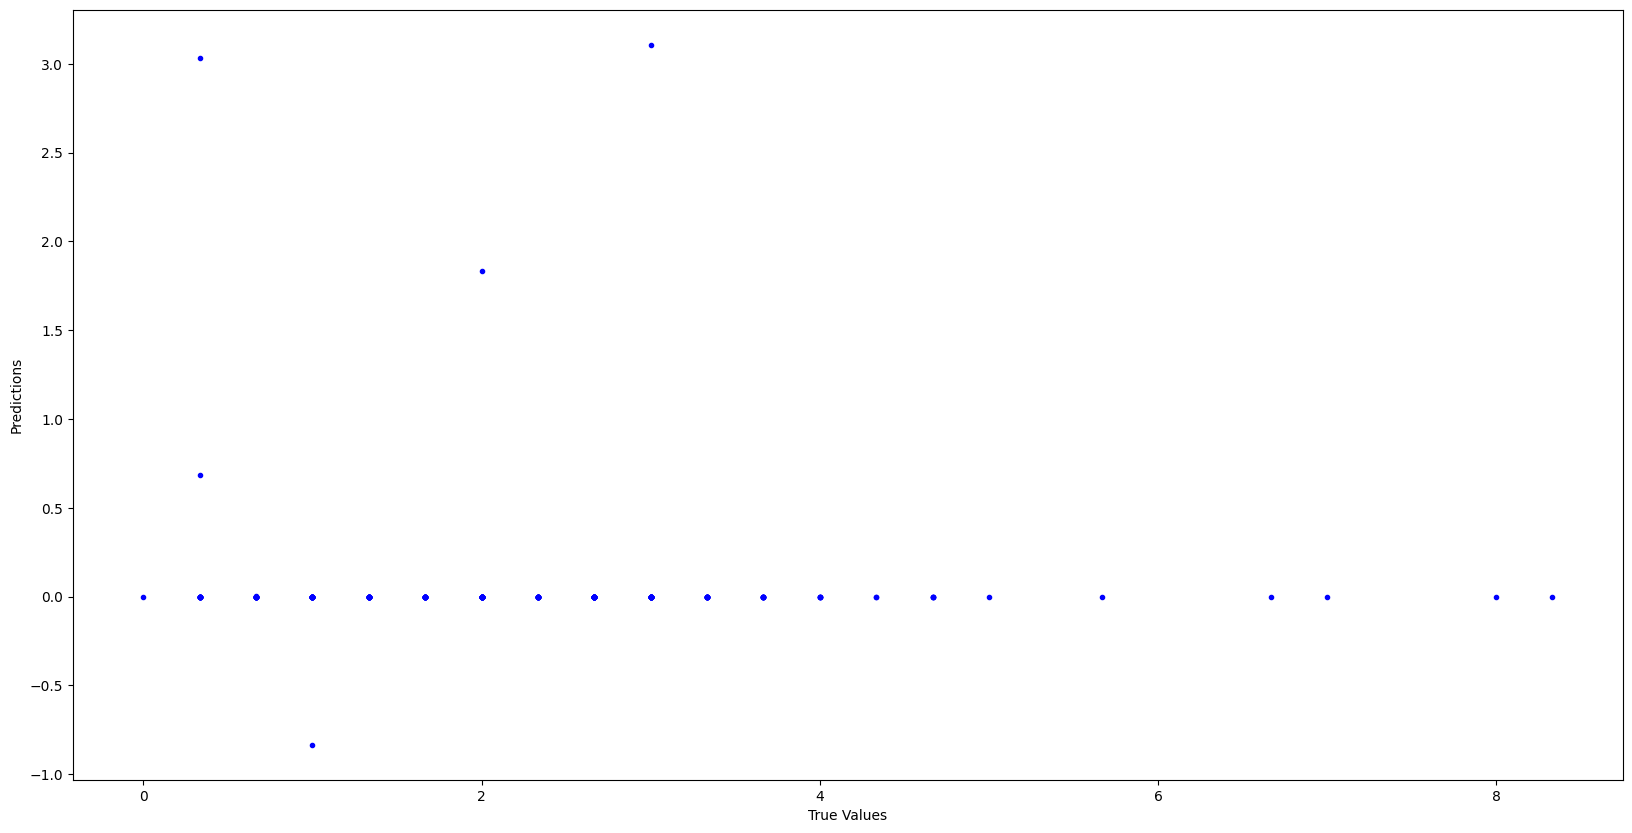

In [53]:
# give accuracy scores
gp_model.score(X_test, y_test)
# r2 ans MSE
y_pred = gp_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Plot the predictions
plt.figure(figsize=(20,10))

plt.plot(y_test, y_pred, 'b.')

plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

#### RNN

In [5]:
df = pd.read_csv('Merged_Kp.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 47 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    976 non-null    object 
 1   Bx      976 non-null    object 
 2   By      976 non-null    object 
 3   Bz      976 non-null    object 
 4   a       976 non-null    float64
 5   b       976 non-null    float64
 6   c       976 non-null    float64
 7   d       976 non-null    float64
 8   e       976 non-null    float64
 9   f       976 non-null    float64
 10  g       976 non-null    float64
 11  h       976 non-null    float64
 12  i       976 non-null    float64
 13  j       976 non-null    float64
 14  k       976 non-null    float64
 15  l       976 non-null    float64
 16  m       976 non-null    float64
 17  n       976 non-null    float64
 18  o       976 non-null    float64
 19  p       976 non-null    float64
 20  q       976 non-null    float64
 21  r       976 non-null    float64
 22  s 